In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [764]:
df = pd.read_excel('DetailSales.xlsx')

# EDA

In [765]:
df.shape

(25158, 12)

In [766]:
df.columns

Index(['id', 'Orden ID', 'Producto', 'Nombre', 'Cantidad', 'Precio', 'Total',
       'Vendedor', 'Fecha', 'Usuario', 'Creado', 'Impuesto'],
      dtype='object')

In [767]:
df.head()

,id,Orden ID,Producto,Nombre,Cantidad,Precio,Total,Vendedor,Fecha,Usuario,Creado,Impuesto
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08 00:00:00,ADMIN,2021-12-06 06:41:00,1.19
1,037b90c1,52ad5614,50,COLOR RAIZ X50G,4,700,2800,9f04044e,2021-01-10 00:00:00,ADMIN,2021-12-06 08:11:00,1.19
2,7addf8af,d1c1e8db,50,COLOR RAIZ X50G,6,700,4200,9f04044e,2021-02-08 00:00:00,ADMIN,2021-12-06 08:56:00,1.19
3,7c6dc67f,c7b6cf8c,50,COLOR RAIZ X50G,12,700,8400,9f04044e,2021-02-08 00:00:00,ADMIN,2021-12-06 08:59:00,1.19
4,69b6d156,1a248fee,50,COLOR RAIZ X50G,6,700,4200,c5abb107,2021-02-10 00:00:00,ADMIN,2021-12-06 09:35:00,1.19


In [768]:
df.dtypes

id           object
Orden ID     object
Producto      int64
Nombre       object
Cantidad      int64
Precio        int64
Total         int64
Vendedor     object
Fecha        object
Usuario      object
Creado       object
Impuesto    float64
dtype: object

<AxesSubplot:>

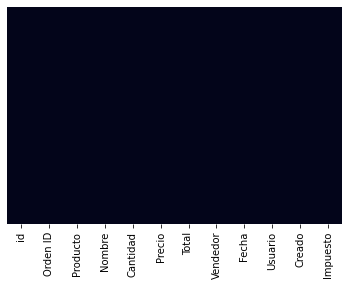

In [769]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [770]:
print(df.duplicated(subset=['Fecha']).sum())
print(df.duplicated(subset=['Creado']).sum())

24780
5996


In [771]:
df = df.drop(['Creado', 'Usuario'], axis=1)

In [772]:
print(df.apply(lambda col: col.nunique()))

id          25158
Orden ID     3113
Producto      157
Nombre        202
Cantidad       38
Precio         85
Total         364
Vendedor        4
Fecha         378
Impuesto        3
dtype: int64


In [773]:
productsales = pd.DataFrame(df.groupby('Nombre')['Total'].sum())
total_sales = productsales['Total'].sum()
productsales['Percent of Total Sales'] = productsales['Total'] / total_sales * 100
productsales.sort_values('Total', ascending=False)

,Total,Percent of Total Sales
Nombre,,
CANELA ASTILLA X20G,9309100,6.005262
EMPAQUE DE CHORIZO X4M,8009900,5.167154
CANELA ASTILLA X5G,7819300,5.044198
CANELA ASTILLA X10G,7402140,4.775090
AJO MOLIDO X 40 G,5114800,3.299537
...,...,...
FINAS HIERVAS X20G,4000,0.002580
SALSA CON ESPECIES VINAGRETA,3800,0.002451
MANI DULCE,3000,0.001935


([<matplotlib.patches.Wedge at 0x7fd9a1a684c0>,
 [Text(1.0948957862952349, 0.10584525097017453, ''),
  Text(1.0498440794119401, 0.32837084055027815, ''),
  Text(0.4529968364658485, 1.0023940672968559, ''),
  Text(-0.6491374894417673, -0.8880430844284751, '')])

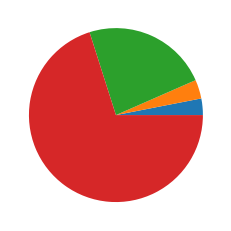

In [774]:
vendorsales = df.groupby('Vendedor')['Total'].sum()
plt.pie(vendorsales)

## Market Basket

In [775]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [776]:
# Assuming 'df' is the original transactional dataset with columns 'Transaction ID' and 'Item'
# Group the items by transaction ID
basket = df.groupby(['Orden ID'])['Nombre'].apply(list)

# Convert the items to a one-hot encoded matrix
te = TransactionEncoder()
basket_te = te.fit_transform(basket)

# Convert the one-hot encoded matrix to a DataFrame
basket_df = pd.DataFrame(basket_te, columns=te.columns_)

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(basket_df, min_support=0.05,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

combiprod = frequent_itemsets[frequent_itemsets['length'] >= 2]



In [777]:
combiprod.sort_values(by='support', ascending=False)

,support,itemsets,length
124,0.175072,"(CLAVO ENTERO X5G, CANELA ASTILLA X5G)",2
138,0.165114,"(UVAS PASAS X40G, CANELA ASTILLA X5G)",2
51,0.162865,"(CANELA ASTILLA X5G, AJO MOLIDO X 40 G)",2
80,0.148089,"(CANELA ASTILLA X5G, BICARBONATO X50G)",2
129,0.136524,"(CURCUMA X20G, CANELA ASTILLA X5G)",2
...,...,...,...
218,0.050112,"(MANZANILLA X10G, AJO MOLIDO X 40 G, CANELA AS...",3
262,0.050112,"(CLAVO ENTERO X5G, CALENDULA X10G, PIMIENTA MO...",3
203,0.050112,"(AJO MOLIDO X 40 G, PIMIENTA MOLIDA X10G, BICA...",3
248,0.050112,"(CLAVO ENTERO X5G, COLOR SUPER X30G, BICARBONA...",3


## Min and max orders per month


In [778]:
df['date'] = pd.to_datetime(df['Fecha'])

In [779]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month
df['Day'] = df['Fecha'].dt.day

In [780]:
print("Unique years ", df['Year'].sort_values().unique())
print("Unique month ", df['Month'].sort_values().unique())
print("Unique days ", df['Day'].sort_values().unique())

Unique years  [2021 2022 2023]
Unique month  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique days  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [781]:
grouped_df = df.groupby(['Nombre', 'Year', 'Month']).agg({'Total': ['mean', 'min', 'max']}).reset_index()

In [782]:
grouped_df.sort_values(['Nombre','Year', 'Month']).round(0)

Nombre  Year Month   Total            
                                         mean   min   max
0     ABLANDA CARNE X 40G  2021     4  4400.0  2400  8000
1     ABLANDA CARNE X 40G  2021     5  4800.0  4800  4800
2     ABLANDA CARNE X 40G  2021     7  4400.0  4000  4800
3     ABLANDA CARNE X 40G  2021     8  5600.0  1600  9600
4     ABLANDA CARNE X 40G  2021     9  5600.0  2400  9600
...                   ...   ...   ...     ...   ...   ...
2546    ÁCIDO BÓRICO X20G  2022    11  3000.0  2400  3600
2547    ÁCIDO BÓRICO X20G  2022    12  3600.0  3600  3600
2548    ÁCIDO BÓRICO X20G  2023     1  3000.0  2400  3600
2549    ÁCIDO BÓRICO X20G  2023     2  2400.0  2400  2400
2550    ÁCIDO BÓRICO X20G  2023     3  3600.0  3600  3600

[2551 rows x 6 columns]

## Total Sales per Month

In [783]:
df.head()

,id,Orden ID,Producto,Nombre,Cantidad,Precio,Total,Vendedor,Fecha,Impuesto,date,Year,Month,Day
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08,1.19,2021-01-08,2021,1,8
1,037b90c1,52ad5614,50,COLOR RAIZ X50G,4,700,2800,9f04044e,2021-01-10,1.19,2021-01-10,2021,1,10
2,7addf8af,d1c1e8db,50,COLOR RAIZ X50G,6,700,4200,9f04044e,2021-02-08,1.19,2021-02-08,2021,2,8
3,7c6dc67f,c7b6cf8c,50,COLOR RAIZ X50G,12,700,8400,9f04044e,2021-02-08,1.19,2021-02-08,2021,2,8
4,69b6d156,1a248fee,50,COLOR RAIZ X50G,6,700,4200,c5abb107,2021-02-10,1.19,2021-02-10,2021,2,10


In [784]:
df['YEAR-MONTH'] = (df['Year'].astype(str) + '-' + df['Month'].astype(str))

In [785]:
df['YEAR-MONTH'] = pd.to_datetime(df['YEAR-MONTH'])

In [786]:
monthlysales = df.groupby(['YEAR-MONTH'])['Total'].sum().reset_index()

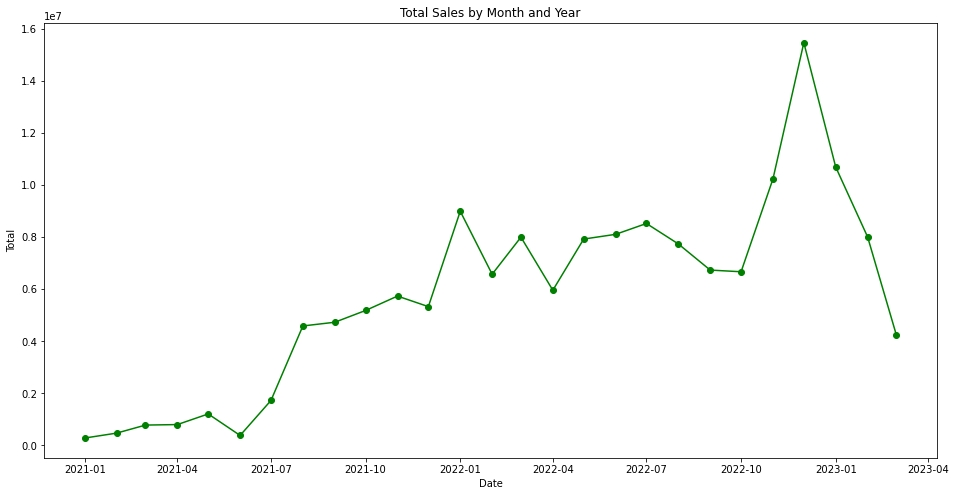

In [787]:
# Create the line chart
plt.figure(figsize=(16,8))
plt.plot(monthlysales['YEAR-MONTH'], monthlysales['Total'], 'go-')

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Total Sales by Month and Year')

# Show the chart
plt.show()

In [788]:
pricechange = df.groupby('Nombre').agg({'Precio': ['min', 'max']}).reset_index()

In [789]:
pricechange['PriceChanged'] = pricechange.apply(lambda row: row[('Precio', 'min')] != row[('Precio', 'max')], axis=1)

In [790]:
# drop the second level of the column index
pricechange.columns = pricechange.columns.droplevel()

# rename the columns to remove the empty string left by dropping the second level
pricechange = pricechange.rename(columns={'': 'Nombre' ,'min': 'PrecioMin', 'max': 'PrecioMax'})

# add a new column to indicate whether the price changed or not
pricechange['PriceChanged'] = pricechange['PrecioMin'] != pricechange['PrecioMax']


In [794]:
changed = pricechange[pricechange['PriceChanged']].Nombre
didnotchange = pricechange[pricechange['PriceChanged'] == False]

In [802]:
print('Count of products that changed price: ', changed.nunique())
print('Count of products that did not change price: ', didnotchange['Nombre'].nunique())

Count of products that changed price:  Nombre    100
Nombre      1
dtype: int64
Count of products that did not change price:  Nombre    102
Nombre      1
dtype: int64
